In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('student_info.csv')

In [4]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [5]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
study_hours,195.0,6.995949,1.25306,5.01,5.775,7.12,8.085,8.99
student_marks,200.0,77.933750,4.92570,68.57,73.385,77.71,82.320,86.99


In [9]:
df.shape

(200, 2)

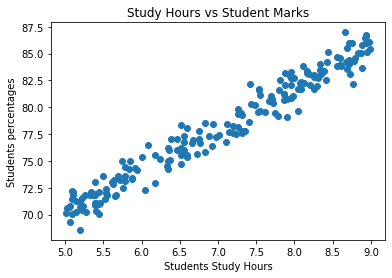

In [11]:
plt.scatter(x=df.study_hours , y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students percentages")
plt.title("Study Hours vs Student Marks")
plt.show()

##  Data Cleaning


In [13]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [14]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [15]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [16]:
df2 = df.fillna(df.mean())

In [17]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [18]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [25]:
X = df2.drop('student_marks',axis = 'columns')
y = df2.drop('study_hours',axis = 'columns')

In [26]:
X

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000
...,...
195,7.530000
196,8.560000
197,8.940000
198,6.600000


In [27]:
X.shape

(200, 1)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [30]:
X_train.shape

(160, 1)

In [31]:
y_test.shape

(40, 1)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
lr.coef_

array([[3.88956921]])

In [36]:
lr.intercept_

array([50.75796659])

In [39]:
lr.predict([[4]])[0][0]

C:\Users\Ojas_Adhikari\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.31624344643353

In [40]:
lr.predict([[4]])[0][0].round(2)

C:\Users\Ojas_Adhikari\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.32

In [41]:
y_pred = lr.predict(X_test)

In [42]:
y_pred

array([[78.72396924],
       [70.28360404],
       [77.96919334],
       [84.94727998],
       [81.32998061],
       [76.4291234 ],
       [84.8305929 ],
       [79.19071754],
       [85.56961105],
       [81.13550215],
       [83.04139106],
       [77.67378555],
       [71.72274465],
       [84.55832306],
       [79.65746585],
       [85.64740244],
       [81.71893753],
       [84.67501013],
       [70.94483081],
       [81.40777199],
       [79.34630031],
       [71.13930927],
       [71.72274465],
       [78.99623908],
       [71.95611881],
       [70.55587389],
       [71.9950145 ],
       [75.37893971],
       [78.99623908],
       [77.96919334],
       [80.902128  ],
       [73.16188526],
       [80.00752708],
       [70.40029112],
       [85.45292398],
       [71.76164034],
       [84.79169721],
       [84.05267906],
       [80.04642277],
       [77.86826401]])

In [44]:
pd.DataFrame(np.c_[X_test,y_test,y_pred], columns = ['study_hours','student_marks_original','student_marks_predicted'])

,study_hours,student_marks_original,student_marks_predicted
0,7.190000,78.21,78.723969
1,5.020000,70.58,70.283604
2,6.995949,76.14,77.969193
3,8.790000,84.60,84.947280
4,7.860000,81.25,81.329981
5,6.600000,75.55,76.429123
6,8.760000,82.21,84.830593
7,7.310000,77.59,79.190718
8,8.950000,85.15,85.569611
9,7.810000,82.55,81.135502


In [45]:
lr.score(X_test,y_test)

0.952823978445243

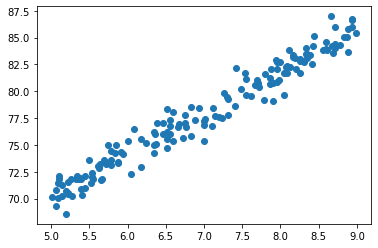

In [46]:
plt.scatter(X_train,y_train)

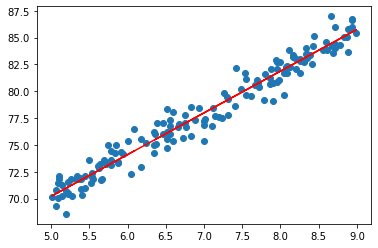

In [47]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),color = 'r')

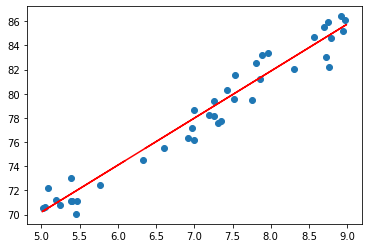

In [48]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color = 'r')

In [49]:
import joblib

In [50]:
joblib.dump(lr,'Students_mark_predictor_model.pkl')

['Students_mark_predictor_model.pkl']

In [51]:
model = joblib.load('Students_mark_predictor_model.pkl')

In [52]:
model.predict([[5]])

C:\Users\Ojas_Adhikari\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[70.20581266]])